Double Smoothing w/ damped trend:
    to overcome the problem with double smoothing = assumes trend stays forever
    damping factor (phi) = exponentially reduces the trend over time
                         
    if phi = 1, equivalent to double smoothing
    if phi = 0, equivalent to simple smoothing

Model:
    forecast(t+1) = a(t) + phi*b(t)

Limitation:
    cannot recognize a seasonal pattern
    

In [1]:
import pandas as pd
import numpy as np

In [6]:
def double_smoothing_damped(demand, future_periods=1, alpha=0.4, beta=0.4, phi=0.9):
    columns = len(demand)
    demand =np.append(demand, [np.nan]*future_periods)
    forecast,a,b = np.full((3,columns+future_periods),np.nan)
    
    #initialization
    a[0] = demand[0]
    b[0] = demand[1] - demand[0]

    for t in range(1,columns):
        forecast[t] = a[t-1] + phi*b[t-1]
        a[t] = alpha*d[t] + (1-alpha)*(a[t-1]+phi*b[t-1])
        b[t] = beta*(a[t]-a[t-1]) + (1-beta)*phi*b[t-1]

    # Forecast for all extra periods
    for t in range(columns,columns+future_periods):
        forecast[t] = a[t-1] + phi*b[t-1]
        a[t] = forecast[t]
        b[t] = phi*b[t-1]
    
    df = pd.DataFrame.from_dict({'Demand':demand,'Forecast':forecast,'Level':a, 'Trend':b, 'Error': demand-forecast})
    return df

In [3]:
def kpi3(df):
    average_demand = df.loc[df['Error'].notnull(),'Demand'].mean()
    print(f"average demand: {average_demand}")
    bias = df['Error'].mean()
    scaled_bias = bias/average_demand
    print('Bias: {:0.2f},{:.2%}'.format(bias,scaled_bias))
    
    MAE = df['Error'].abs().mean()
    scaled_MAE = MAE/average_demand
    print('MAE: {:0.2f}, {:.2%}'.format(MAE,scaled_MAE))
    
    RMSE = np.sqrt((df['Error']**2).mean())
    scaled_RMSE = RMSE/average_demand
    print('RMSE: {:0.2f}, {:.2%}'.format(RMSE,scaled_RMSE))

In [7]:
d = [28,19,18,12,18,18,18,16,13,19,16,11,15,15,16,15,13,11,11,13,12]
df = double_smoothing_damped(d, future_periods=4)
kpi3(df)

average demand: 14.95
Bias: 1.69,11.27%
MAE: 3.40, 22.74%
RMSE: 4.74, 31.73%


<Axes: title={'center': 'Double smoothing damped'}, xlabel='Period'>

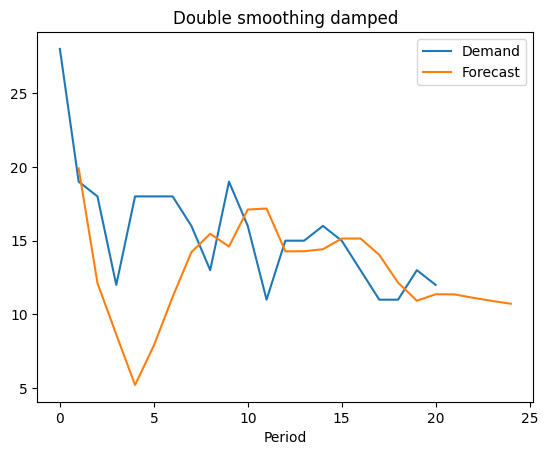

In [8]:
df.index.name = 'Period'
df[['Demand','Forecast']].plot(title='Double smoothing damped')